# Visibility Metrics for Java
<br>  

### References
- [Visibility Metrics and the Importance of Hiding Things](https://dzone.com/articles/visibility-metrics-and-the-importance-of-hiding-th)
- [Calculate metrics](https://101.jqassistant.org/calculate-metrics/index.html)
- [Controlling Access to Members of a Class](https://docs.oracle.com/javase/tutorial/java/javaOO/accesscontrol.html)
- [Neo4j Python Driver](https://neo4j.com/docs/api/python-driver/current)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from neo4j import GraphDatabase

In [2]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [3]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [4]:
# Main Colormap
main_color_map = 'nipy_spectral'

In [5]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [6]:
def get_cypher_query_from_file(cypherFileName):
    with open(cypherFileName) as file:
        return ' '.join(file.readlines())

In [7]:
def query_cypher_to_data_frame(filename):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename))
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [8]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [9]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

## Relative Visibility Of Types

A Java class or interface may be declared with the modifier public, in which case it is visible to all classes everywhere. If a class or interface has no modifier (the default, also known as package-private), it is visible only within its own package.

The relative visibility is the number of inner components that are visible outside (public) divided by the number of all types:

$$ relative visibility = \frac{public\:types}{all\:types} $$

Using package protected types is one of many ways to improve encapsulation and implementation detail hiding.

### How to apply the results

The relative visibility is between zero (all types are package protected) and one (all types are public). A value lower than one means that there are types that are declared package protected. The lower the value is, the better implementation details are hidden. 

Non public classes can't be accessed from another package so they can be changed without affecting code in other packages. They clearly indicate functionality that only belongs to one package. This also motivates to use more classes and to split up code into smaller pieces with a single responsibility and reason to change.

### Table 1a - Top 40 artifacts with lowest median of package protection encapsulation

This table shows the relative visibility statistics aggregated for all packages per artifact and focusses on artifacts with many packages and hardly any package protected types (lowest median, high visibility). Package protected types would help to  improve encapsulation.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Global_relative_visibility_statistics_for_types`

In [10]:
# Query the visibility statistics per artifact (all packages aggregated)
# The results Will be used in multiple tables below.
relative_visibility_per_artifact_aggregated=query_cypher_to_data_frame("../cypher/Visibility/Global_relative_visibility_statistics_for_types.cypher")

In [11]:
# Sort by the "percentile50" (median) and "all" (number of packages in the artifact) descending
relative_visibility_statistics_highest_median=relative_visibility_per_artifact_aggregated.sort_values(by=['percentile50', 'all'], ascending=[False, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
relative_visibility_statistics_highest_median=relative_visibility_statistics_highest_median.reset_index(drop=True)

relative_visibility_statistics_highest_median.head(40)

,artifact,all,public,min,max,average,percentile25,percentile50,percentile75,percentile90
0,axon-spring-boot-autoconfigure-4.10.0,74,67,0.750000,1.000000,0.949234,1.000000,1.000000,1.000000,1.000000
1,axon-tracing-opentelemetry-4.10.0,5,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,axon-messaging-4.10.0,787,645,0.136364,1.000000,0.867147,0.750000,0.973684,1.000000,1.000000
3,axon-server-connector-4.10.0,131,102,0.428571,1.000000,0.857633,0.784615,0.909091,1.000000,1.000000
4,axon-modelling-4.10.0,156,135,0.500000,1.000000,0.806526,0.737500,0.813187,0.897222,1.000000
5,axon-eventsourcing-4.10.0,133,98,0.500000,1.000000,0.771804,0.612903,0.785714,1.000000,1.000000
6,axon-test-4.10.0,87,65,0.473684,1.000000,0.781086,0.650000,0.775000,0.968750,1.000000
7,axon-configuration-4.10.0,41,28,0.682927,0.682927,0.682927,0.682927,0.682927,0.682927,0.682927
8,axon-disruptor-4.10.0,22,9,0.409091,0.409091,0.409091,0.409091,0.409091,0.409091,0.409091


### Table 1b - Top 40 artifacts with highest median of package protection encapsulation

This table shows the relative visibility statistics aggregated for all packages per artifact and focusses on artifacts with many packages and the highest median of package protected types (low visibility). Package protected types help to improve encapsulation.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Global_relative_visibility_statistics_for_types`

In [12]:
# Sort by the "percentile50" (median) ascending and "all" (number of packages in the artifact) descending
relative_visibility_statistics_lowest_median=relative_visibility_per_artifact_aggregated.sort_values(by=['percentile50', 'all'], ascending=[True, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
relative_visibility_statistics_lowest_median=relative_visibility_statistics_lowest_median.reset_index(drop=True)

relative_visibility_statistics_lowest_median.head(40)

,artifact,all,public,min,max,average,percentile25,percentile50,percentile75,percentile90
0,axon-disruptor-4.10.0,22,9,0.409091,0.409091,0.409091,0.409091,0.409091,0.409091,0.409091
1,axon-configuration-4.10.0,41,28,0.682927,0.682927,0.682927,0.682927,0.682927,0.682927,0.682927
2,axon-test-4.10.0,87,65,0.473684,1.000000,0.781086,0.650000,0.775000,0.968750,1.000000
3,axon-eventsourcing-4.10.0,133,98,0.500000,1.000000,0.771804,0.612903,0.785714,1.000000,1.000000
4,axon-modelling-4.10.0,156,135,0.500000,1.000000,0.806526,0.737500,0.813187,0.897222,1.000000
5,axon-server-connector-4.10.0,131,102,0.428571,1.000000,0.857633,0.784615,0.909091,1.000000,1.000000
6,axon-messaging-4.10.0,787,645,0.136364,1.000000,0.867147,0.750000,0.973684,1.000000,1.000000
7,axon-spring-boot-autoconfigure-4.10.0,74,67,0.750000,1.000000,0.949234,1.000000,1.000000,1.000000,1.000000
8,axon-tracing-opentelemetry-4.10.0,5,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Table 1 Chart 1 - Relative visibility in artifacts

/home/runner/miniconda3/envs/codegraph/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 640x480 with 0 Axes>

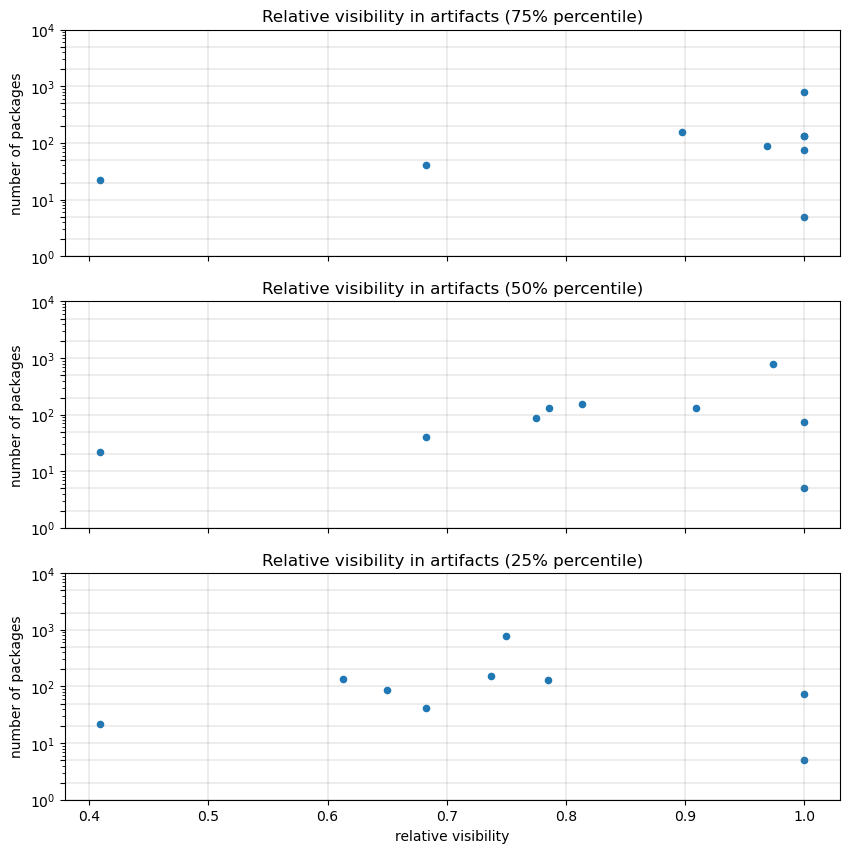

In [13]:
plot.figure();
fig, axes = plot.subplots(nrows=3, ncols=1, sharex=True)

number_of_packages_grid_ticks=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000, 2_000, 5_000, 10_000]

relative_visibility_per_artifact_aggregated.plot(
    ax=axes[0],
    kind='scatter',
    title='Relative visibility in artifacts (75% percentile)', 
    x='percentile75',
    y='all',
    grid=True,
    logy=True,
    yticks=number_of_packages_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of packages',
    cmap=main_color_map,
    figsize=(10,4),
)
relative_visibility_per_artifact_aggregated.plot(
    ax=axes[1],
    kind='scatter',
    title='Relative visibility in artifacts (50% percentile)', 
    x='percentile50',
    y='all',
    grid=True,
    logy=True,
    yticks=number_of_packages_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of packages',
    cmap=main_color_map,
    figsize=(10,4),
)
relative_visibility_per_artifact_aggregated.plot(
    ax=axes[2],
    kind='scatter',
    title='Relative visibility in artifacts (25% percentile)', 
    x='percentile25',
    y='all',
    grid=True,
    logy=True,
    yticks=number_of_packages_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of packages',
    cmap=main_color_map,
    figsize=(10,10),
)
axes[0].grid(color = 'grey', linestyle = '-', linewidth = 0.2)
axes[1].grid(color = 'grey', linestyle = '-', linewidth = 0.2)
axes[2].grid(color = 'grey', linestyle = '-', linewidth = 0.2)
plot.show()

### Table 2a - Top 40 packages with the highest visibility and lowest encapsulation

This table shows the relative visibility statistics per packages and artifact and focusses on packages with many types, hardly any package protected ones and therefore the highest relative visibility (lowest encapsulation). Package protected types would help to improve encapsulation.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Relative_visibility_public_types_to_all_types_per_package`

In [14]:
# Query the visibility statistics per package and artifact (all types aggregated)
# The results Will be used in multiple tables below.
relative_visibility_per_package=query_cypher_to_data_frame("../cypher/Visibility/Relative_visibility_public_types_to_all_types_per_package.cypher")

In [15]:
# Sort by the "relativeVisibility" and "allTypes" (number of types in the package) descending
highest_relative_visibility_packages=relative_visibility_per_package.sort_values(by=['relativeVisibility', 'allTypes'], ascending=[False, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
highest_relative_visibility_packages=highest_relative_visibility_packages.reset_index(drop=True)

highest_relative_visibility_packages.head(40)

,artifactName,fullQualifiedPackageName,packageName,publicTypes,allTypes,relativeVisibility
0,axon-modelling-4.10.0,org.axonframework.modelling.saga,saga,33,33,1.0
1,axon-spring-boot-autoconfigure-4.10.0,org.axonframework.springboot,springboot,25,25,1.0
2,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.eventstore.jdb...,statements,15,15,1.0
3,axon-messaging-4.10.0,org.axonframework.serialization.upcasting.event,event,12,12,1.0
4,axon-messaging-4.10.0,org.axonframework.lifecycle,lifecycle,10,10,1.0
5,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.conflictresolu...,conflictresolution,9,9,1.0
6,axon-messaging-4.10.0,org.axonframework.common.property,property,9,9,1.0
7,axon-spring-boot-autoconfigure-4.10.0,org.axonframework.springboot.util,util,9,9,1.0
8,axon-messaging-4.10.0,org.axonframework.messaging.interceptors,interceptors,8,8,1.0
9,axon-messaging-4.10.0,org.axonframework.messaging.responsetypes,responsetypes,8,8,1.0


### Table 2b - Top 40 packages with the lowest visibility and highest encapsulation

This table shows the relative visibility statistics per packages and artifact and focusses on packages with many types, many package protected ones and therefore the lowest relative visibility (highest encapsulation). Package protected types help to improve encapsulation. Zero percent visibility and therefore packages with no public visible type are suspicious to be dead code.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Relative_visibility_public_types_to_all_types_per_package`

In [16]:
# Sort by the "relativeVisibility" ascending and "allTypes" (number of types in the package) descending
lowest_relative_visibility_packages=relative_visibility_per_package.sort_values(by=['relativeVisibility', 'allTypes'], ascending=[True, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
lowest_relative_visibility_packages=lowest_relative_visibility_packages.reset_index(drop=True)

lowest_relative_visibility_packages.head(40)

,artifactName,fullQualifiedPackageName,packageName,publicTypes,allTypes,relativeVisibility
0,axon-messaging-4.10.0,org.axonframework.eventhandling.pooled,pooled,3,22,0.136364
1,axon-messaging-4.10.0,org.axonframework.eventhandling.deadletter,deadletter,2,5,0.400000
2,axon-disruptor-4.10.0,org.axonframework.disruptor.commandhandling,commandhandling,9,22,0.409091
3,axon-server-connector-4.10.0,org.axonframework.axonserver.connector.query,query,9,21,0.428571
4,axon-test-4.10.0,org.axonframework.test.aggregate,aggregate,9,19,0.473684
5,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.eventstore.leg...,legacyjpa,5,10,0.500000
6,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.eventstore.inm...,inmemory,1,2,0.500000
7,axon-messaging-4.10.0,org.axonframework.eventhandling.tokenstore.inm...,inmemory,1,2,0.500000
8,axon-modelling-4.10.0,org.axonframework.modelling.saga.repository.in...,inmemory,1,2,0.500000
9,axon-messaging-4.10.0,org.axonframework.commandhandling.gateway,gateway,19,34,0.558824


### Table 2 Chart 1 - Relative visibility of packages

/home/runner/miniconda3/envs/codegraph/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 640x480 with 0 Axes>

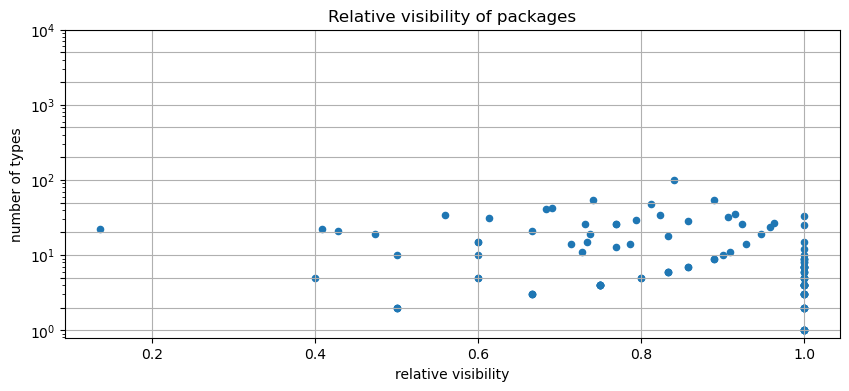

In [17]:
plot.figure();

number_of_types_grid_ticks=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000, 2_000, 5_000, 10_000]

relative_visibility_per_package.plot(
    kind='scatter',
    title='Relative visibility of packages', 
    x='relativeVisibility',
    y='allTypes',
    grid=True,
    logy=True,
    yticks=number_of_types_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of types',
    cmap=main_color_map,
    figsize=(10,4),
)

plot.show()